# Exploración de la tabla de eventos

En este notebook encontrarás un proceso de lectura apicable a los archivos CSV de la tabla de eventos de la base de datos GDELT 1.0, así como una pequeña exploración del archivo, que consiste en:

1. Una visualización de la tabla
2. Un resumen de los 10 valores más frecuentes de cada columna, por conteo de GLOBALEVENTID's
3. Una lista con los 100 sitios con más noticias dentro de este archivo
4. Una gráfica acumulativa del porcentaje de noticias cubiertas por los X portales con mayor cantidad de artículos, sobre el total de registros en el archivo.

In [1]:
import polars as pl
import matplotlib.pyplot as plt

### Lectura de un archivo CSV añadiendo los nombres de las columnas

In [2]:
df = pl.read_csv(
    '20240812.export.CSV',
    infer_schema_length = 0,
    separator = '\t',
    has_header = False
)

df.columns = [
    'GLOBALEVENTID',    'SQLDATE',    'MonthYear',    'Year',
    'FractionDate',    'Actor1Code',    'Actor1Name',    'Actor1CountryCode',
    'Actor1KnownGroupCode',   'Actor1EthnicCode',   'Actor1Religion1Code',   'Actor1Religion2Code',
    'Actor1Type1Code',    'Actor1Type2Code',    'Actor1Type3Code',    'Actor2Code',
    'Actor2Name',    'Actor2CountryCode',    'Actor2KnownGroupCode',    'Actor2EthnicCode',
    'Actor2Religion1Code',    'Actor2Religion2Code',    'Actor2Type1Code',    'Actor2Type2Code',
    'Actor2Type3Code',    'IsRootEvent',    'EventCode',    'EventBaseCode',
    'EventRootCode',    'QuadClass',    'GoldsteinScale',    'NumMentions',
    'NumSources',    'NumArticles',    'AvgTone',    'Actor1Geo_Type',
    'Actor1Geo_FullName',    'Actor1Geo_CountryCode',    'Actor1Geo_ADM1Code',    'Actor1Geo_Lat',
    'Actor1Geo_Long',    'Actor1Geo_FeatureID',    'Actor2Geo_Type',    'Actor2Geo_FullName',
    'Actor2Geo_CountryCode',    'Actor2Geo_ADM1Code',    'Actor2Geo_Lat',    'Actor2Geo_Long',
    'Actor2Geo_FeatureID',    'ActionGeo_Type',    'ActionGeo_FullName',    'ActionGeo_CountryCode',
    'ActionGeo_ADM1Code',    'ActionGeo_Lat',    'ActionGeo_Long',    'ActionGeo_FeatureID',
    'DATEADDED',    'SOURCEURL']

df

GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,Actor1Religion1Code,Actor1Religion2Code,Actor1Type1Code,Actor1Type2Code,Actor1Type3Code,Actor2Code,Actor2Name,Actor2CountryCode,Actor2KnownGroupCode,Actor2EthnicCode,Actor2Religion1Code,Actor2Religion2Code,Actor2Type1Code,Actor2Type2Code,Actor2Type3Code,IsRootEvent,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,Actor1Geo_Type,Actor1Geo_FullName,Actor1Geo_CountryCode,Actor1Geo_ADM1Code,Actor1Geo_Lat,Actor1Geo_Long,Actor1Geo_FeatureID,Actor2Geo_Type,Actor2Geo_FullName,Actor2Geo_CountryCode,Actor2Geo_ADM1Code,Actor2Geo_Lat,Actor2Geo_Long,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""1192141740""","""20230813""","""202308""","""2023""","""2023.6110""","""GBR""","""SCOTLAND""","""GBR""",null,null,null,null,null,null,null,"""INDEDU""","""MADRAS""","""IND""",null,null,null,null,"""EDU""",null,null,"""0""","""051""","""051""","""05""","""1""","""3.4""","""4""","""2""","""4""","""-0.60030150210…","""4""","""Northern Irela…","""UK""","""UKR8""","""54.5""","""-6.5""","""-2604275""","""4""","""Northern Irela…","""UK""","""UKR8""","""54.5""","""-6.5""","""-2604275""","""4""","""Northern Irela…","""UK""","""UKR8""","""54.5""","""-6.5""","""-2604275""","""20240812""","""https://jersey…"
"""1192141741""","""20230813""","""202308""","""2023""","""2023.6110""","""GBREDU""","""SCOTLAND""","""GBR""",null,null,null,null,"""EDU""",null,null,"""GBR""","""SCOTLAND""","""GBR""",null,null,null,null,null,null,null,"""0""","""051""","""051""","""05""","""1""","""3.4""","""12""","""2""","""12""","""-0.60030150210…","""4""","""Northern Irela…","""UK""","""UKR8""","""54.5""","""-6.5""","""-2604275""","""4""","""Northern Irela…","""UK""","""UKR8""","""54.5""","""-6.5""","""-2604275""","""4""","""Northern Irela…","""UK""","""UKR8""","""54.5""","""-6.5""","""-2604275""","""20240812""","""https://jersey…"
"""1192141742""","""20230813""","""202308""","""2023""","""2023.6110""","""GOV""","""MINISTRY""",null,null,null,null,null,"""GOV""",null,null,null,null,null,null,null,null,null,null,null,null,"""1""","""012""","""012""","""01""","""1""","""-0.4""","""20""","""1""","""20""","""-3.63819321839…","""4""","""Phuket, Phuket…","""TH""","""TH62""","""7.83333""","""98.3833""","""-3253342""","""0""",null,null,null,null,null,null,"""4""","""Phuket, Phuket…","""TH""","""TH62""","""7.83333""","""98.3833""","""-3253342""","""20240812""","""https://www.ba…"
"""1192141743""","""20230813""","""202308""","""2023""","""2023.6110""","""NZLEDU""","""NEW ZEALAND""","""NZL""",null,null,null,null,"""EDU""",null,null,null,null,null,null,null,null,null,null,null,null,"""0""","""020""","""020""","""02""","""1""","""3.0""","""10""","""1""","""10""","""2.937062937062…","""1""","""New Zealand""","""NZ""","""NZ""","""-42""","""174""","""NZ""","""0""",null,null,null,null,null,null,"""1""","""New Zealand""","""NZ""","""NZ""","""-42""","""174""","""NZ""","""20240812""","""https://menafn…"
"""1192141744""","""20240713""","""202407""","""2024""","""2024.5288""",null,null,null,null,null,null,null,null,null,null,"""USA""","""CALIFORNIA""","""USA""",null,null,null,null,null,null,null,"""1""","""0311""","""031""","""03""","""1""","""5.2""","""5""","""1""","""5""","""-2.65734265734…","""0""",null,null,null,null,null,null,"""2""","""California, Un…","""US""","""USCA""","""36.17""","""-119.746""","""CA""","""2""","""California, Un…","""US""","""USCA""","""36.17""","""-119.746""","""CA""","""20240812""","""https://www.ma…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…

### Exploración de los 10 valores más frecuentes de cada columna
Se hace un conteo de los GLOBALEVENTID que coinciden con cada valor

In [3]:
for col in df.columns:
    if col == 'GLOBALEVENTID': continue
    display(df.group_by(col).agg(pl.col('GLOBALEVENTID').count()).sort(by = 'GLOBALEVENTID', descending = True).head(10))

SQLDATE,GLOBALEVENTID
str,u32
"""20240812""",113637
"""20240805""",1271
"""20240713""",907
"""20230813""",809
"""20240811""",303
"""20140815""",23


MonthYear,GLOBALEVENTID
str,u32
"""202408""",115211
"""202407""",907
"""202308""",809
"""201408""",23


Year,GLOBALEVENTID
str,u32
"""2024""",116118
"""2023""",809
"""2014""",23


FractionDate,GLOBALEVENTID
str,u32
"""2024.6082""",113637
"""2024.5890""",1271
"""2024.5288""",907
"""2023.6110""",809
"""2024.6055""",303
"""2014.6164""",23


Actor1Code,GLOBALEVENTID
str,u32
"""USA""",14288
null,11241
"""GOV""",8057
"""COP""",3626
"""BUS""",3442
"""GBR""",3253
"""CVL""",3199
"""EDU""",2928
"""JUD""",2428


Actor1Name,GLOBALEVENTID
str,u32
null,11241
"""UNITED STATES""",10508
"""UNITED KINGDOM…",2706
"""ISRAEL""",2288
"""POLICE""",2254
"""PRESIDENT""",1567
"""GOVERNMENT""",1413
"""RUSSIA""",1358
"""SCHOOL""",1233


Actor1CountryCode,GLOBALEVENTID
str,u32
null,50862
"""USA""",18726
"""GBR""",3949
"""ISR""",3141
"""RUS""",2520
"""UKR""",2027
"""AUS""",1763
"""IND""",1750
"""CHN""",1662


Actor1KnownGroupCode,GLOBALEVENTID
str,u32
null,115801
"""UNO""",523
"""EEC""",210
"""NAT""",87
"""TAL""",72
"""IRC""",68
"""ASN""",44
"""SAD""",22
"""ICC""",15


Actor1EthnicCode,GLOBALEVENTID
str,u32
null,116151
"""sco""",91
"""idg""",77
"""bre""",47
"""bal""",42
"""sen""",38
"""div""",35
"""kis""",25
"""dak""",22


Actor1Religion1Code,GLOBALEVENTID
str,u32
null,115377
"""CHR""",502
"""MOS""",448
"""JEW""",290
"""HIN""",242
"""NRM""",34
"""BUD""",29
"""SIK""",17
"""JAN""",5


Actor1Religion2Code,GLOBALEVENTID
str,u32
null,116605
"""CTH""",196
"""PRO""",95
"""SHI""",15
"""ALE""",12
"""HSD""",7
"""LDS""",6
"""NRM""",4
"""UDX""",4


Actor1Type1Code,GLOBALEVENTID
str,u32
null,66596
"""GOV""",14114
"""COP""",4726
"""BUS""",3972
"""CVL""",3970
"""EDU""",3796
"""JUD""",3224
"""MIL""",2758
"""MED""",2539


Actor1Type2Code,GLOBALEVENTID
str,u32
null,113603
"""MIL""",659
"""MED""",471
"""GOV""",412
"""HLH""",361
"""EDU""",281
"""BUS""",261
"""DEV""",137
"""JUD""",113


Actor1Type3Code,GLOBALEVENTID
str,u32
null,116861
"""MED""",23
"""BUS""",12
"""LAB""",11
"""MIL""",9
"""GOV""",8
"""EDU""",5
"""ENV""",4
"""HLH""",4


Actor2Code,GLOBALEVENTID
str,u32
null,33236
"""USA""",9942
"""GOV""",5805
"""CVL""",3025
"""ISR""",2729
"""BUS""",2623
"""EDU""",2611
"""COP""",2511
"""GBR""",2369


Actor2Name,GLOBALEVENTID
str,u32
null,33236
"""UNITED STATES""",7740
"""ISRAEL""",2692
"""UNITED KINGDOM…",1988
"""POLICE""",1457
"""GOVERNMENT""",1410
"""RUSSIA""",1350
"""UKRAINE""",1255
"""SCHOOL""",1234


Actor2CountryCode,GLOBALEVENTID
str,u32
null,64425
"""USA""",13219
"""ISR""",3377
"""GBR""",2907
"""RUS""",2435
"""UKR""",1888
"""PSE""",1858
"""CHN""",1392
"""IRN""",1323


Actor2KnownGroupCode,GLOBALEVENTID
str,u32
null,116114
"""UNO""",385
"""EEC""",155
"""TAL""",48
"""ASN""",44
"""IRC""",44
"""NAT""",36
"""SAD""",27
"""COE""",12


Actor2EthnicCode,GLOBALEVENTID
str,u32
null,116362
"""idg""",71
"""sco""",59
"""bal""",27
"""kis""",25
"""div""",19
"""tam""",19
"""ran""",18
"""chy""",18


Actor2Religion1Code,GLOBALEVENTID
str,u32
null,115522
"""CHR""",437
"""MOS""",373
"""JEW""",272
"""HIN""",261
"""NRM""",32
"""BUD""",22
"""SIK""",20
"""JAN""",3


Actor2Religion2Code,GLOBALEVENTID
str,u32
null,116663
"""CTH""",174
"""PRO""",60
"""SHI""",19
"""HSD""",11
"""LDS""",7
"""SUN""",5
"""ALE""",4
"""SFI""",3


Actor2Type1Code,GLOBALEVENTID
str,u32
null,77679
"""GOV""",9944
"""CVL""",3839
"""EDU""",3339
"""COP""",3315
"""BUS""",3042
"""MED""",2405
"""MIL""",2360
"""JUD""",1808


Actor2Type2Code,GLOBALEVENTID
str,u32
null,114645
"""MIL""",396
"""GOV""",313
"""HLH""",230
"""MED""",213
"""EDU""",200
"""BUS""",174
"""DEV""",139
"""JUD""",83


Actor2Type3Code,GLOBALEVENTID
str,u32
null,116887
"""MED""",20
"""COP""",13
"""GOV""",8
"""MIL""",6
"""ELI""",5
"""BUS""",4
"""EDU""",3
"""ENV""",2


IsRootEvent,GLOBALEVENTID
str,u32
"""1""",71220
"""0""",45730


EventCode,GLOBALEVENTID
str,u32
"""010""",9446
"""042""",8846
"""043""",8315
"""020""",7063
"""051""",6957
"""040""",6809
"""190""",5433
"""036""",4064
"""173""",3709


EventBaseCode,GLOBALEVENTID
str,u32
"""010""",9446
"""042""",8846
"""043""",8315
"""020""",7063
"""051""",6957
"""040""",6809
"""190""",5433
"""036""",4064
"""173""",3709


EventRootCode,GLOBALEVENTID
str,u32
"""04""",28080
"""01""",16230
"""05""",9679
"""02""",8552
"""19""",8399
"""11""",7999
"""03""",7007
"""17""",5534
"""08""",4241


QuadClass,GLOBALEVENTID
str,u32
"""1""",69548
"""4""",18063
"""3""",15654
"""2""",13685


GoldsteinScale,GLOBALEVENTID
str,u32
"""0.0""",11577
"""-2.0""",10720
"""1.9""",8846
"""2.8""",8315
"""-10.0""",8181
"""3.4""",7787
"""7.0""",7398
"""3.0""",7063
"""-5.0""",7043


NumMentions,GLOBALEVENTID
str,u32
"""2""",25293
"""10""",14366
"""4""",14103
"""1""",13541
"""6""",10161
"""8""",6844
"""3""",6810
"""5""",6752
"""20""",2274


NumSources,GLOBALEVENTID
str,u32
"""1""",92194
"""2""",11375
"""3""",4029
"""4""",2094
"""5""",1331
"""6""",885
"""7""",600
"""8""",536
"""10""",426


NumArticles,GLOBALEVENTID
str,u32
"""2""",25497
"""10""",14779
"""4""",14216
"""1""",13576
"""6""",10178
"""8""",6872
"""3""",6816
"""5""",6789
"""20""",2154


AvgTone,GLOBALEVENTID
str,u32
"""0""",2236
"""-6.25""",142
"""-5.88235294117…",119
"""-2.5""",106
"""-7.10710710710…",100
"""-6.02836879432…",96
"""2.811244979919…",89
"""-3.44827586206…",89
"""-5""",88


Actor1Geo_Type,GLOBALEVENTID
str,u32
"""4""",48243
"""1""",23393
"""3""",15332
"""0""",14243
"""2""",13273
"""5""",2466


Actor1Geo_FullName,GLOBALEVENTID
str,u32
null,14256
"""Gaza, Israel (…",3886
"""United Kingdom…",1750
"""United States""",1747
"""Tehran, Tehran…",1390
"""New York, Unit…",1390
"""Washington, Di…",1228
"""California, Un…",1046
"""Kyiv, Kyyiv, M…",1028


Actor1Geo_CountryCode,GLOBALEVENTID
str,u32
"""US""",30352
null,14230
"""UK""",6341
"""IS""",6075
"""IN""",5515
"""RS""",3423
"""NI""",3051
"""AS""",2778
"""UP""",2604


Actor1Geo_ADM1Code,GLOBALEVENTID
str,u32
null,14230
"""IS00""",4586
"""USCA""",2957
"""USNY""",2303
"""USTX""",2157
"""USDC""",2026
"""UK""",1750
"""US""",1747
"""IR26""",1399


Actor1Geo_Lat,GLOBALEVENTID
str,u32
null,14257
"""31.4167""",4070
"""38.8951""",1908
"""51.5""",1860
"""54""",1780
"""39.828175""",1747
"""35.75""",1392
"""42.1497""",1390
"""50.4333""",1146


Actor1Geo_Long,GLOBALEVENTID
str,u32
null,14244
"""34.3333""",4070
"""-4""",2049
"""-77.0364""",1908
"""-98.5795""",1747
"""51.5148""",1390
"""-74.9384""",1390
"""30.5167""",1145
"""37.6156""",1064


Actor1Geo_FeatureID,GLOBALEVENTID
str,u32
null,14230
"""-797156""",4070
"""531871""",1908
"""UK""",1750
"""US""",1747
"""CA""",1551
"""NY""",1390
"""10074674""",1390
"""-1044367""",1145


Actor2Geo_Type,GLOBALEVENTID
str,u32
"""4""",39324
"""0""",35475
"""1""",19410
"""3""",11079
"""2""",9813
"""5""",1849


Actor2Geo_FullName,GLOBALEVENTID
str,u32
null,35483
"""Gaza, Israel (…",3903
"""United States""",1445
"""United Kingdom…",1423
"""Tehran, Tehran…",1272
"""New York, Unit…",1050
"""Washington, Di…",1027
"""Kyiv, Kyyiv, M…",1008
"""Israel""",915


Actor2Geo_CountryCode,GLOBALEVENTID
str,u32
null,35459
"""US""",22337
"""IS""",5928
"""UK""",4926
"""IN""",3934
"""RS""",3058
"""UP""",2431
"""NI""",2396
"""BG""",2038


Actor2Geo_ADM1Code,GLOBALEVENTID
str,u32
null,35459
"""IS00""",4503
"""USCA""",2200
"""USNY""",1712
"""USDC""",1612
"""USTX""",1589
"""US""",1445
"""UK""",1423
"""IR26""",1277


Actor2Geo_Lat,GLOBALEVENTID
str,u32
null,35486
"""31.4167""",4085
"""38.8951""",1531
"""51.5""",1483
"""39.828175""",1445
"""54""",1441
"""35.75""",1275
"""50.4333""",1144
"""42.1497""",1050


Actor2Geo_Long,GLOBALEVENTID
str,u32
null,35470
"""34.3333""",4085
"""-4""",1672
"""-77.0364""",1531
"""-98.5795""",1445
"""51.5148""",1272
"""30.5167""",1144
"""-74.9384""",1050
"""37.6156""",985


Actor2Geo_FeatureID,GLOBALEVENTID
str,u32
null,35459
"""-797156""",4085
"""531871""",1531
"""US""",1445
"""UK""",1423
"""10074674""",1272
"""CA""",1227
"""-1044367""",1144
"""NY""",1050


ActionGeo_Type,GLOBALEVENTID
str,u32
"""4""",53183
"""1""",25270
"""3""",17837
"""2""",14585
"""0""",3329
"""5""",2746


ActionGeo_FullName,GLOBALEVENTID
str,u32
"""Gaza, Israel (…",4156
null,3348
"""United States""",1940
"""United Kingdom…",1788
"""Tehran, Tehran…",1422
"""New York, Unit…",1398
"""Washington, Di…",1314
"""California, Un…",1163
"""Kyiv, Kyyiv, M…",1084


ActionGeo_CountryCode,GLOBALEVENTID
str,u32
"""US""",34362
"""UK""",7088
"""IS""",6577
"""IN""",6450
"""RS""",3572
"""NI""",3356
null,3302
"""AS""",3052
"""UP""",2734


ActionGeo_ADM1Code,GLOBALEVENTID
str,u32
"""IS00""",4936
"""USCA""",3342
null,3302
"""USNY""",2453
"""USTX""",2441
"""USDC""",2185
"""US""",1940
"""UK""",1788
"""USFL""",1559


ActionGeo_Lat,GLOBALEVENTID
str,u32
"""31.4167""",4363
null,3351
"""38.8951""",2037
"""39.828175""",1940
"""51.5""",1936
"""54""",1826
"""35.75""",1426
"""42.1497""",1398
"""50.4333""",1211


ActionGeo_Long,GLOBALEVENTID
str,u32
"""34.3333""",4363
null,3324
"""-4""",2094
"""-77.0364""",2037
"""-98.5795""",1940
"""51.5148""",1422
"""-74.9384""",1398
"""30.5167""",1210
"""-119.746""",1163


ActionGeo_FeatureID,GLOBALEVENTID
str,u32
"""-797156""",4363
null,3302
"""531871""",2037
"""US""",1940
"""UK""",1788
"""CA""",1710
"""10074674""",1422
"""NY""",1398
"""-1044367""",1210


DATEADDED,GLOBALEVENTID
str,u32
"""20240812""",116950


SOURCEURL,GLOBALEVENTID
str,u32
"""https://dissid…",103
"""https://www.ha…",102
"""https://www.ju…",96
"""https://www.ch…",92
"""https://www.mi…",86
"""https://www.jo…",86
"""https://organi…",80
"""https://asiane…",79
"""https://thenat…",78


### Conteo de los 50 sitios web que aparecen con más frecuencia en el dataset
Se utiliza una expresión regular para obtener el sitio web

In [4]:
pl.Config.set_fmt_str_lengths(100)
pl.Config.set_tbl_rows(100)

df.with_columns(
    pl.col('SOURCEURL').str.extract(r"http(s?):\/\/(www\.)?(.+?\.).+?\/",0).alias('extract')
).group_by(
    'extract'
).agg(
    pl.col('GLOBALEVENTID').count()
).sort(
    by = 'GLOBALEVENTID',
    descending = True
).head(100)

extract,GLOBALEVENTID
str,u32
"""https://www.yahoo.com/""",5062
"""https://www.dailymail.co.uk/""",1357
"""https://timesofindia.indiatimes.com/""",1241
"""https://menafn.com/""",1179
"""https://www.globalsecurity.org/""",1054
"""https://allafrica.com/""",856
"""https://www.newsweek.com/""",785
"""https://www.marketscreener.com/""",705
"""https://www.hindustantimes.com/""",665


Text(0.5, 1.0, 'Registros acumulados')

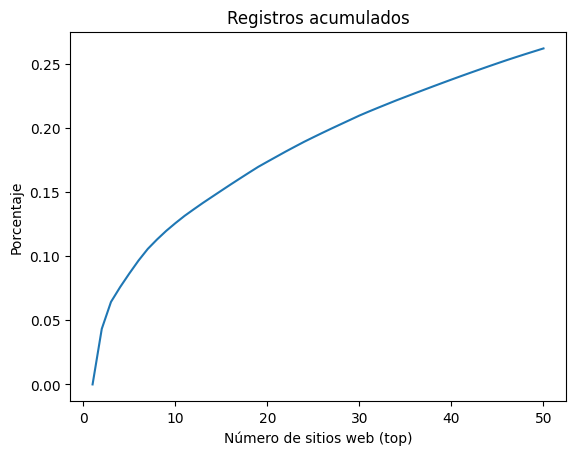

In [5]:
x = []
y = []

df_ = df.with_columns(
    pl.col('SOURCEURL').str.extract(r"https:\/\/(www\.)?(.+?\.).+?\/",0).alias('extract')
).group_by(
    'extract'
).agg(
    pl.col('GLOBALEVENTID').count()
).sort(
    by = 'GLOBALEVENTID',
    descending = True
)

for i in range(50):
    fulfillment = df_.head(i)['GLOBALEVENTID'].sum()/df.height
    x.append(i+1)
    y.append(fulfillment)

plt.plot(x,y)
plt.xlabel('Número de sitios web (top)')
plt.ylabel('Porcentaje')
plt.title('Registros acumulados')